In [65]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [40]:
print(boston.data.shape)
boston_housing = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_housing.head() 

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [42]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [43]:
boston_housing['MEDV'] = boston.target

In [44]:
boston_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\Raghav K\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


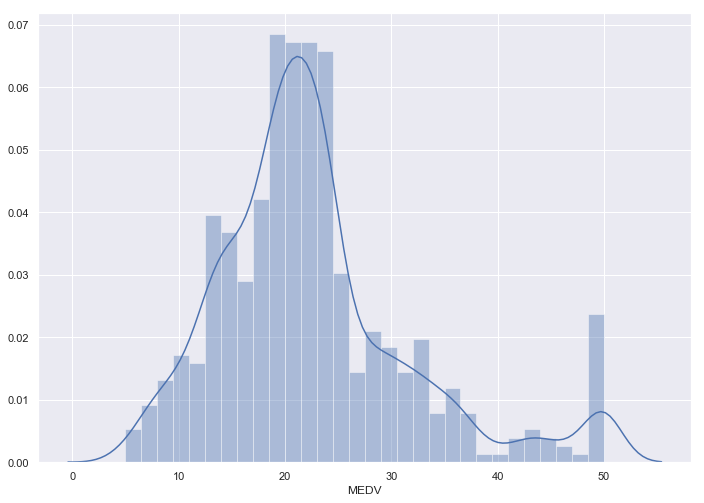

In [45]:
#Exploratory Data Analysis:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_housing['MEDV'],bins=30)
plt.show()

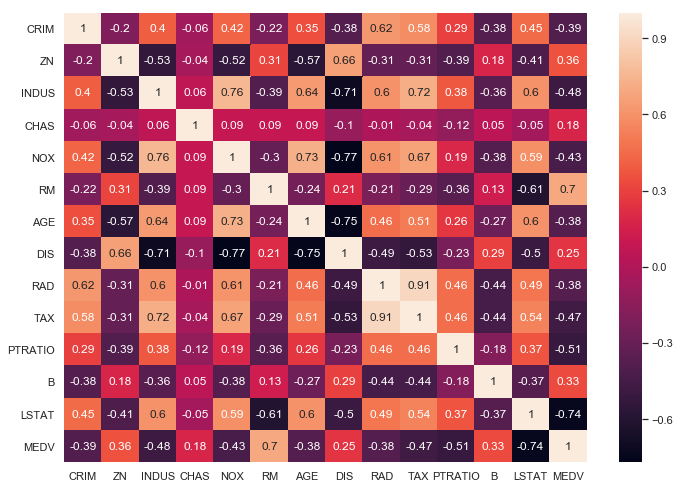

In [46]:
#Correlation Matrix
correlation_matrix = boston_housing.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

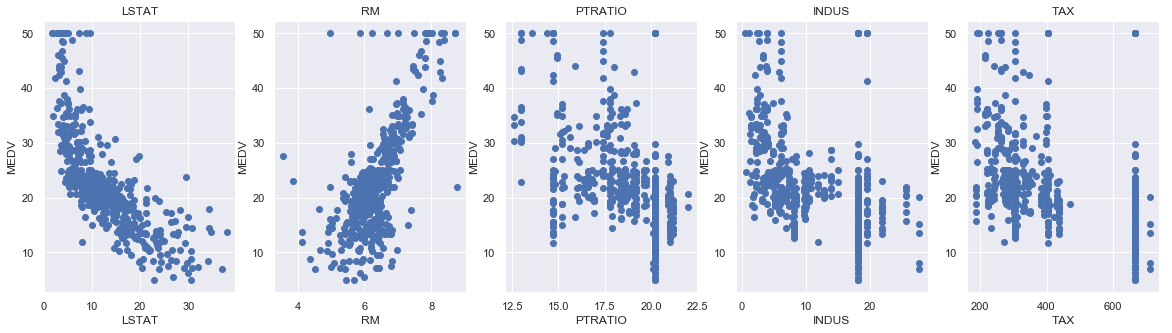

In [47]:
plt.figure(figsize=(20,5))
features = ['LSTAT','RM','PTRATIO','INDUS','TAX']
target = boston_housing['MEDV']
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=boston_housing[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [48]:
#Concatenating the columns using np.c_ provided in numpy library
X = pd.DataFrame(np.c_[boston_housing['LSTAT'], boston_housing['RM'],boston_housing['PTRATIO'],boston_housing['INDUS'],boston_housing['TAX']], columns = ['LSTAT','RM','PTRATIO','INDUS','TAX'])
Y = boston_housing['MEDV']

In [70]:
#Centering and Scaling using pipeline
X_scaled = scale(X)
print("Mean of Unscaled features is {}".format(np.mean(X)))
print("Standard Deviation of Unscaled features is {}".format(np.std(X)))
print("Mean of Scaled features is {}".format(np.mean(X_scaled)))
print("Standard Deviation of Scaled features is {}".format(np.std(X_scaled)))
print("-------------------------------------------")
#Setting up the pipeline 'steps'
steps = [('scaler',StandardScaler()),
        ('LinReg',LinearRegression())]

pipeline = Pipeline(steps)

#Splitting the data into testing and training data
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=40)

#Fitting the model in training and testing data
pipeline.fit(X_train,y_train)

# Evaluating the scaled model in training data
y_pred_train_scaled = pipeline.predict(X_train)
rmse_train_scaled = (np.sqrt(mean_squared_error(y_train,y_pred_train)))
r2_scaled = r2_score(y_train, y_pred_train_scaled)
print('R2 score in training format when scaled is --> {}'.format(r2_scaled))
print('Root Mean Squared Error in training format when scaled is --> {}'.format(rmse_train_scaled))
print('-------------------------------------------------------------')
#Evaluating the scaled model in test data
y_pred_test_scaled = pipeline.predict(X_test)
r2_test_scaled = r2_score(y_test,y_pred_test_scaled)
rmse_test_scaled = (np.sqrt(mean_squared_error(y_test,y_pred_test_scaled)))
print('R2 score in test format when scaled is --> {}'.format(r2_test_scaled))
print('Root Mean Squared Error in test format when scaled is --> {}'.format(rmse_test_scaled))

Mean of Unscaled features is LSTAT       12.653063
RM           6.284634
PTRATIO     18.455534
INDUS       11.136779
TAX        408.237154
dtype: float64
Standard Deviation of Unscaled features is LSTAT        7.134002
RM           0.701923
PTRATIO      2.162805
INDUS        6.853571
TAX        168.370495
dtype: float64
Mean of Scaled features is -5.077712514838977e-15
Standard Deviation of Scaled features is 0.9999999999999991
-------------------------------------------
R2 score in training format when scaled is --> 0.6975367639771715
Root Mean Squared Error in training format when scaled is --> 11.643059059034169
-------------------------------------------------------------
R2 score in test format when scaled is --> 0.6234642870258384
Root Mean Squared Error in test format when scaled is --> 6.53523535823305


In [49]:
#Partitioning the data into test and train with test size 20%
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

#Applying Simple Linear Regression
#Instantiating the Linear Regression model
lin_model = LinearRegression()
#Fitting the model to the feature and target in the training data
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
#Evaluating the model in training data
y_pred_train = lin_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train,y_pred_train)))
r2 = r2_score(y_train, y_pred_train)
print('R2 score in training format is --> {}'.format(r2))
print('Root Mean Squared Error in training format is --> {}'.format(rmse_train))

R2 score in training format is --> 0.6902578367787744
Root Mean Squared Error in training format is --> 5.187326481879792


In [51]:
#Evaluating the model in test data
y_pred_test = lin_model.predict(X_test)
r2_test = r2_score(y_test,y_pred_test)
rmse_test = (np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2 score in test format is --> {}'.format(r2_test))
print('Root Mean Squared Error in test format is --> {}'.format(rmse_test))

R2 score in test format is --> 0.6196683547405624
Root Mean Squared Error in test format is --> 5.281208043853648


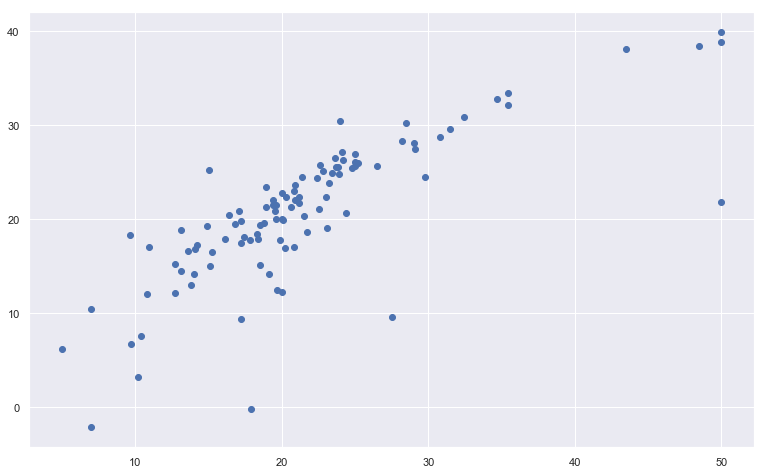

In [52]:
#plotting y-test vs y-test-pred
plt.figure(figsize=(13,8))
plt.scatter(y_test,y_pred_test)
plt.show()

In [53]:
#Performing 5 fold cross validation
cv_results = cross_val_score(lin_model,X,y,cv=5)
print(cv_results)
np.mean(cv_results)

[ 0.71377765  0.70194426  0.54612093  0.05425592 -0.09952365]


0.3833150195564666